In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

import sys
import after_subtle.module as asmod
import after_subtle.util as asutil
import after_subtle.stats as asstats



import Project.Broad.params2 as params
min_occurrence = params.min_occurrence

DIR = {
    'gria3_male_wt': params.DIR_gria3_male_wt,
    'gria3_male_mut': params.DIR_gria3_male_mut,
    'setd1a_male_wt': params.DIR_setd1a_male_wt,
    'setd1a_male_het': params.DIR_setd1a_male_het,
    'setd1a_female_wt': params.DIR_setd1a_female_wt,
    'setd1a_female_het': params.DIR_setd1a_female_het
    }   # directory of the data extracted from the subtle

SAVE_DIR_LIST = {
    'gria3_male_wt': params.SAVE_DIR_gria3_male,
    'gria3_male_mut': params.SAVE_DIR_gria3_male,
    'setd1a_male_wt': params.SAVE_DIR_setd1a_male,
    'setd1a_male_het': params.SAVE_DIR_setd1a_male,
    'setd1a_female_wt': params.SAVE_DIR_setd1a_female,
    'setd1a_female_het': params.SAVE_DIR_setd1a_female
    }   # directory to save the analysis from after_subtle

COORDS_DIR = {
    'gria3_male_wt': params.COORDS_DIR,
    'gria3_male_mut': params.COORDS_DIR,
    'setd1a_male_wt': params.COORDS_DIR,
    'setd1a_male_het': params.COORDS_DIR,
    'setd1a_female_wt': params.COORDS_DIR,
    'setd1a_female_het': params.COORDS_DIR
    }   # directory of the coordinates of groups

# calculate the density map
analysis_names = ['gria3_male_wt', 'gria3_male_mut', 'setd1a_male_wt', 'setd1a_male_het', 'setd1a_female_wt', 'setd1a_female_het']

# color map
red_color = np.array([(0.7, 0, 0)])
red_color = red_color.reshape(1, 3)
complementary_color = mcolors.rgb_to_hsv(red_color)
complementary_color[0, 0] = (complementary_color[0, 0] + 0.5) % 1.0
complementary_color = mcolors.hsv_to_rgb(complementary_color)

color_list = {
    'gria3_male_wt': complementary_color,
    'gria3_male_mut': red_color,
    'setd1a_male_wt': complementary_color,
    'setd1a_male_het': red_color,
    'setd1a_female_wt': complementary_color,
    'setd1a_female_het': red_color
    }   # directory of the color code of groups

# cmap_complementary = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, 'white'), (1, complementary_color)])
# cmap_both = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, complementary_color), (0.5, 'white'), (1, red_color)])

sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl

Draw density map in a group

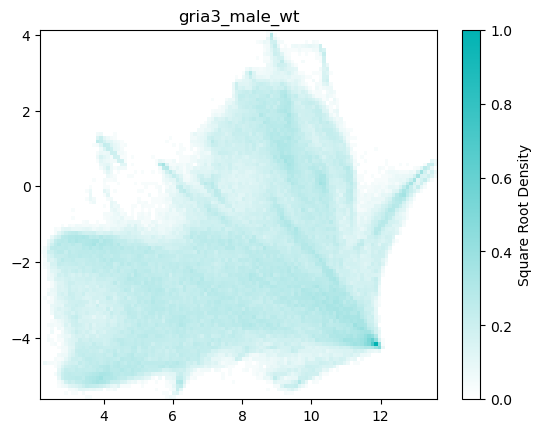

In [10]:
Draw_name = 'gria3_male_wt'

# use glob to find all subdirectories containing the desired files
Draw_DIR = DIR[Draw_name]
SAVE_DIR = SAVE_DIR_LIST[Draw_name]
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
    
folder_list = acl.get_csv_paths(Draw_DIR)

# Compute the density map
color_code = color_list[Draw_name]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, 'white'), (1, color_code)])

asmod.density_map(folder_list, cmap=cmap)

plt.title(Draw_name)
plt.savefig(os.path.join(SAVE_DIR, Draw_name)+'_density_map.pdf', transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, Draw_name)+'_density_map.png', transparent=False, dpi=300)
plt.show()

Differential density map for two groups (ex. WT vs. KO)

['C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#11', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#14', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#15', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#2', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#3', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#5', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#7', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_MUT_M_#9']
['C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model_subtle_20231101_090236\\GRIA3_WT_M_#1', 'C:\\Users\\MyPC\\Deskto

c:\Users\MyPC\Desktop\git\after_subtle\after_subtle\after_subtle\module.py:251: RuntimeWarning: invalid value encountered in sqrt
  dendiff_sqrt = np.where(dendiff >= 0, np.sqrt(dendiff), -np.sqrt(np.abs(dendiff)))


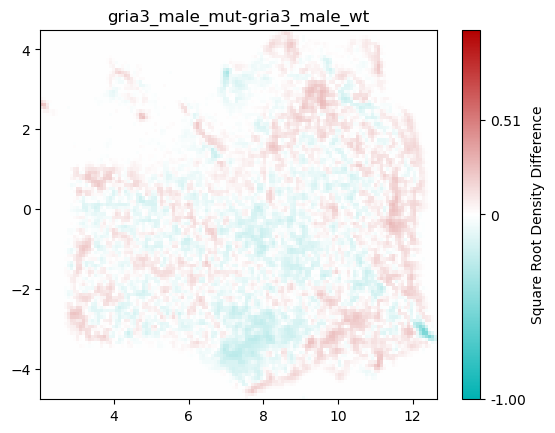

In [18]:
group1 = 'gria3_male_mut'
group2 = 'gria3_male_wt'
SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

##
pair_name = group1 + '-' + group2

# find all subdirectories containing the desired files for Group 1
DIR1 = DIR[group1]
group1_folder_list = acl.get_csv_paths(DIR1)
print(group1_folder_list)

# find all subdirectories containing the desired files for Group 2
DIR2 = DIR[group2]
group2_folder_list = acl.get_csv_paths(DIR2)
print(group2_folder_list)

# Define the colors
color_code_group1 = color_list[group1]
color_code_group2 = color_list[group2]
cmap_both = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, color_code_group2), (0.5, 'white'), (1, color_code_group1)])
cmap = cmap_both

# Draw
asmod.draw_dendiff_sqrt(group1_folder_list, group2_folder_list, cmap=cmap, bin_size=0.08)
plt.title(pair_name)
plt.savefig(os.path.join(SAVE_DIR, pair_name) + '_norm.pdf', transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, pair_name) + '_norm.png', transparent=False, dpi=300)

Draw behavioral density heatmap for all groups

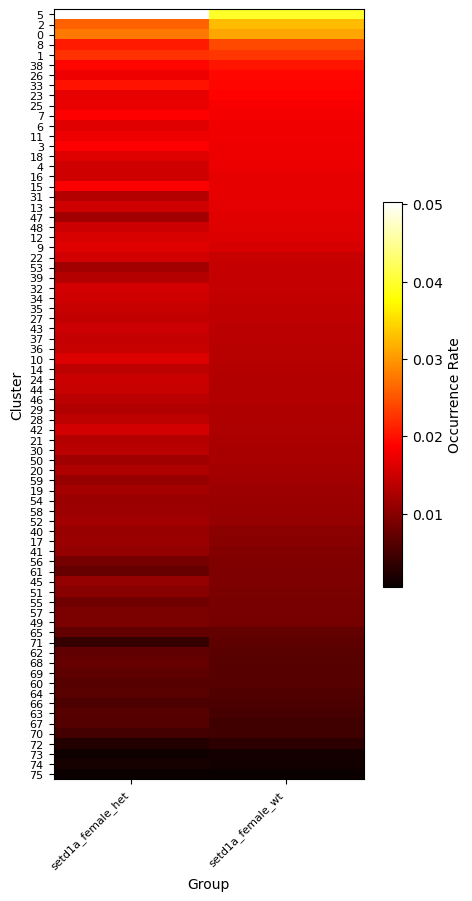

In [21]:
import after_subtle.module as asmod
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

subcluster_num = params.subcluster_num

group = 3
if group == 1:
    group1 = 'gria3_male_mut'
    group2 = 'gria3_male_wt'
elif group == 2:
    group1 = 'setd1a_male_het'
    group2 = 'setd1a_male_wt'
elif group == 3:
    group1 = 'setd1a_female_het'
    group2 = 'setd1a_female_wt'


SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

##
# Define the directory
DIR1 = DIR[group1]
DIR2 = DIR[group2]
group1_folder_list = acl.get_csv_paths(DIR1)
group2_folder_list = acl.get_csv_paths(DIR2)

# calculate the density map
group_folder_lists = [group1_folder_list, group2_folder_list]
group_names = [group1, group2]
group_ref = [group2] # cluster aligned to the order of 'group_ref'

cluster_counts = asmod.compare_cluster_occurrence(group_folder_lists, group_names, subcluster_number=subcluster_num, target_groups=group_ref)

# Apply square root transformation
#cluster_counts_sqrt = np.sqrt(cluster_counts)

# grouped_clusters = [f"{i}-{i+2}" for i in range(0, len(cluster_counts), 3)]
cluster_counts = cluster_counts.iloc[:,:]

fig, ax = plt.subplots(figsize=(5, 10))  # Increase the figure size

im = ax.imshow(cluster_counts.values, cmap='hot', aspect='auto')
ax.set_xticks(range(len(cluster_counts.columns)))
ax.set_xticklabels(cluster_counts.columns, fontsize=8, rotation=45, ha='right')

# Adjust the spacing between the ticks on the y-axis
ax.set_yticks(range(len(cluster_counts.index)))
ax.set_yticklabels(cluster_counts.index, fontsize=8)  # Increase the font size for y-axis ticks
    
plt.xlabel('Group')
plt.ylabel('Cluster')
cbar = plt.colorbar(im, label='Occurrence Rate',shrink=0.5)

filename_save = 'heatmap_cluster_occurrence_' + group1 + ',' + group2
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.png'), transparent=False, dpi=300)

### Draw difference of behavioral usages between groups

    GRIA3_MUT_M_#11  GRIA3_MUT_M_#14  GRIA3_MUT_M_#15  GRIA3_MUT_M_#2  \
0          0.015446         0.018812         0.015978        0.013308   
1          0.020452         0.020429         0.018718        0.012267   
2          0.020566         0.013993         0.022352        0.012788   
3          0.024292         0.009950         0.030802        0.011138   
4          0.016157         0.017102         0.017622        0.015015   
..              ...              ...              ...             ...   
72         0.000313         0.000560         0.000317        0.000000   
73         0.004352         0.000777         0.002884        0.002199   
74         0.002589         0.000342         0.000433        0.001042   
75         0.000085         0.000187         0.000115        0.000000   
76         0.000114         0.000000         0.000144        0.000723   

    GRIA3_MUT_M_#3  GRIA3_MUT_M_#5  GRIA3_MUT_M_#7  GRIA3_MUT_M_#9  
0         0.020444        0.014655        0.016399    

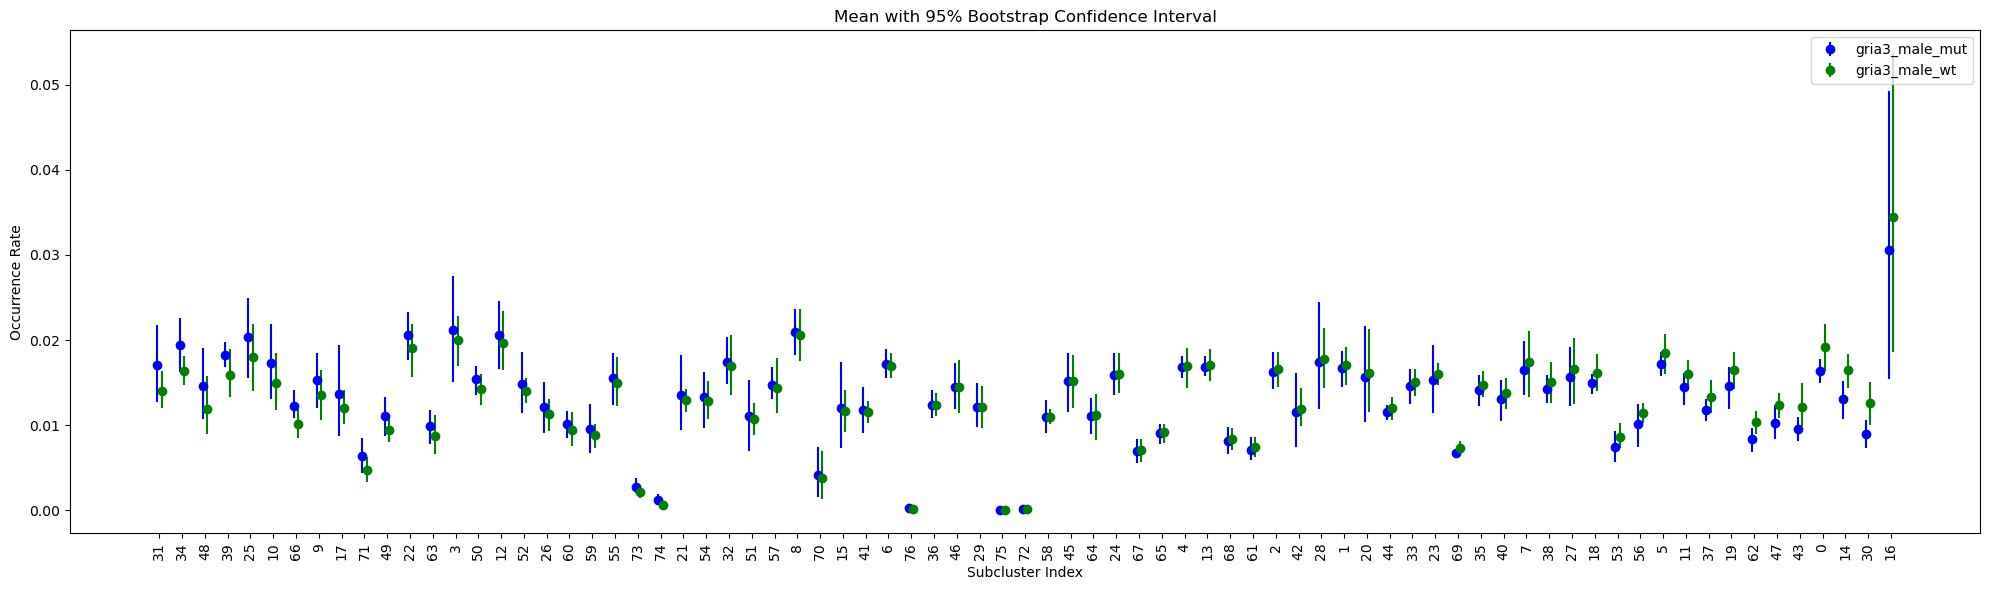

In [13]:
###########################################
# Params setting
cluster_name = 'subcluster'

group = 1
if group == 1:
    group1 = 'gria3_male_mut'
    group2 = 'gria3_male_wt'
elif group == 2:
    group1 = 'setd1a_male_het'
    group2 = 'setd1a_male_wt'
elif group == 3:
    group1 = 'setd1a_female_het'
    group2 = 'setd1a_female_wt'

###########################################
subcluster_num = params.subcluster_num
supercluster_num = params.supercluster_num

if cluster_name == 'subcluster':
    cluster_num = subcluster_num
elif cluster_name == 'supercluster':
    cluster_num = supercluster_num

SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# Define the colors
color_code_group1 = color_list[group1]
color_code_group2 = color_list[group2]

group1_folder_list = acl.get_csv_paths(DIR[group1])
group2_folder_list = acl.get_csv_paths(DIR[group2])

# Calculate the density map
try:
    cluster_counts1 = asmod.calculate_filewise_cluster_occurrence(group1_folder_list, cluster_num, cluster_name)
    print(cluster_counts1)
except ValueError as e:
    print(e)

try:
    cluster_counts2 = asmod.calculate_filewise_cluster_occurrence(group2_folder_list, cluster_num, cluster_name)
    print(cluster_counts2)
except ValueError as e:
    print(e)

# Calculate the mean and standard deviation of the occurrence rate for each cluster
group1_means = cluster_counts1.mean(axis=1)
group2_means = cluster_counts2.mean(axis=1)

# Calculate the mean ratios
mean_ratios = group1_means - group2_means
#mean_ratios = (group1_means - group2_means) / (group1_means + group2_means)

sorted_indices = mean_ratios.sort_values(ascending=False).index # Sort the mean ratios in descending order along with their indices

# Calculate bootstrap confidence intervals for each subcluster
group1_conf_intervals = [asstats.bootstrap_confidence_interval(cluster_counts1.loc[cluster]) for cluster in sorted_indices]
group2_conf_intervals = [asstats.bootstrap_confidence_interval(cluster_counts2.loc[cluster]) for cluster in sorted_indices]

# Calculate confidence intervals for error bars
group1_errors = [(group1_means[cluster] - interval[0], interval[1] - group1_means[cluster]) for cluster, interval in zip(sorted_indices, group1_conf_intervals)]
group2_errors = [(group2_means[cluster] - interval[0], interval[1] - group2_means[cluster]) for cluster, interval in zip(sorted_indices, group2_conf_intervals)]

# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

# Define offset for x positions
offset = 0.1  # Adjust this offset value as needed

# Plot data (shift x position to the left by the offset)
ax.errorbar(x=np.array(range(len(sorted_indices))) - offset, y=group1_means[sorted_indices], yerr=np.array(group1_errors).T, fmt='o', label=group1, color='blue')
ax.errorbar(x=np.array(range(len(sorted_indices))) + offset, y=group2_means[sorted_indices], yerr=np.array(group2_errors).T, fmt='o', label=group2, color='green')

# Adjust the position of the X-axis label
labels = []
for i, label in enumerate(sorted_indices):
    labels.append(plt.Text(i, 0, str(label), ha='center', va='center', fontsize=8))

# Adjust odd label position
for i in range(1, len(labels), 2):
    labels[i].set_position((i, -0.1))  # Move odd labels further down

ax.set_xticks(range(len(sorted_indices)))
ax.set_xticklabels(labels, rotation=90)

# Set the x-axis and y-axis labels and title
if cluster_name == 'subcluster':
    ax.set_xlabel('Subcluster Index')
elif cluster_name == 'supercluster':
    ax.set_xlabel('Supercluster Index')
ax.set_ylabel('Occurrence Rate')
ax.set_title('Mean with 95% Bootstrap Confidence Interval')
ax.legend()

# Adjust the spacing to prevent overlapping labels
fig.tight_layout()

# Save the figure
filename_save = cluster_name + '_mean_std_' + group1 + ',' + group2
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.png'), transparent=False, dpi=300)

plt.show()

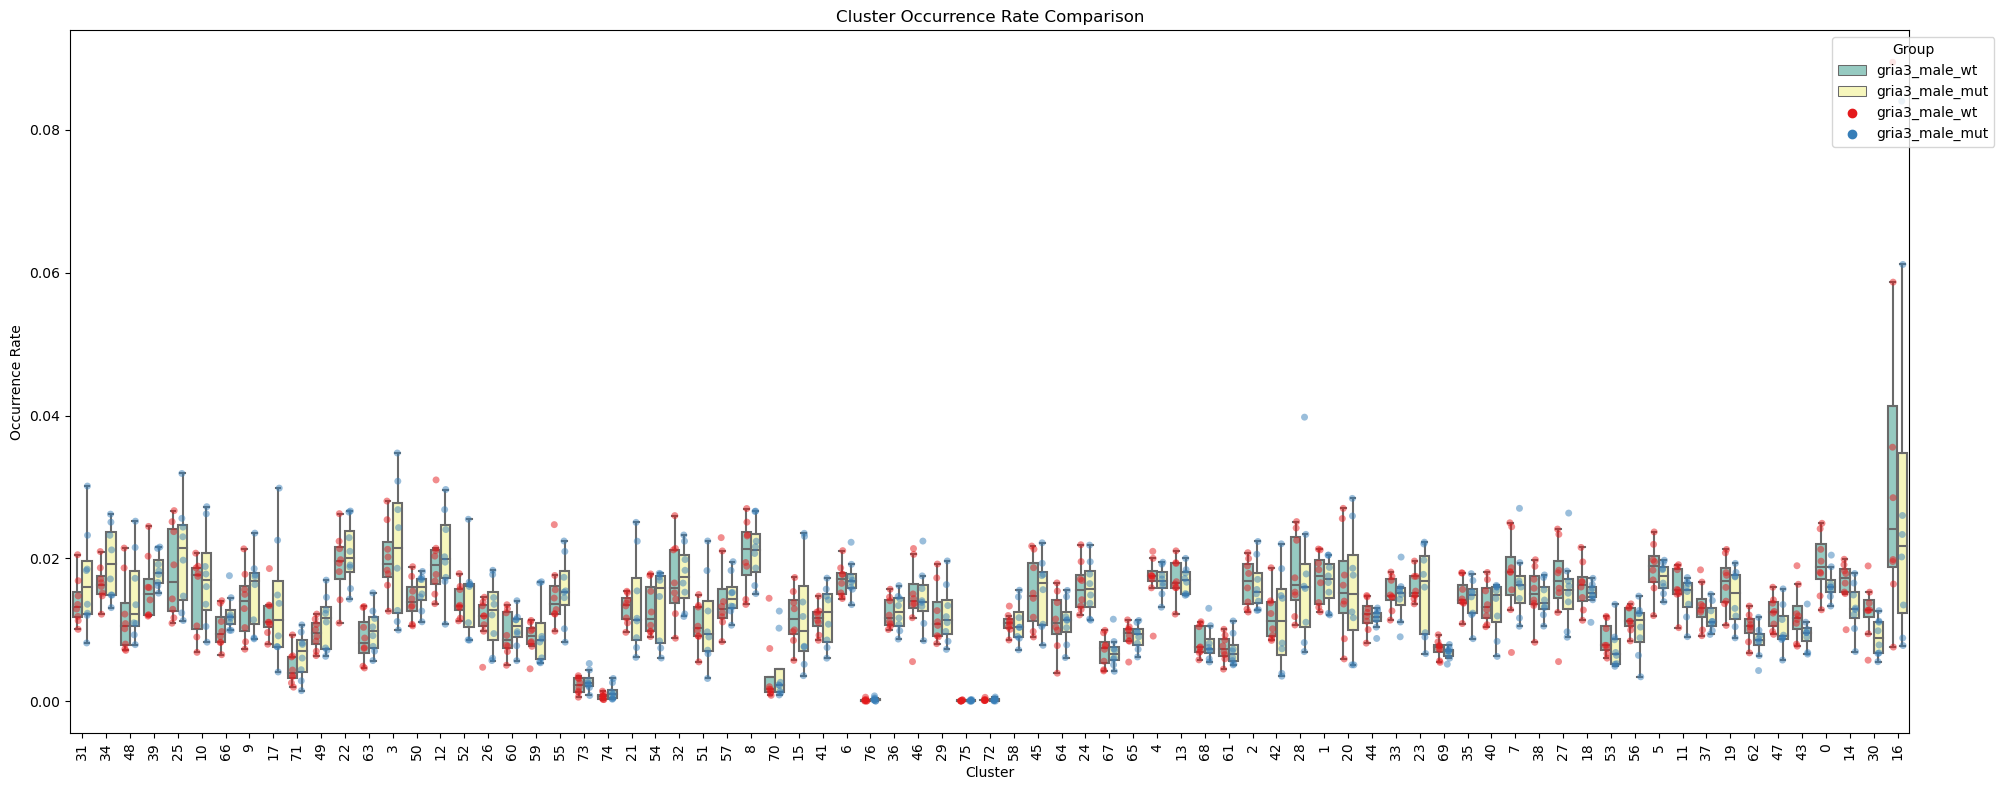

In [15]:
# Plot box-whisker plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sorted_indices를 기준으로 DataFrame의 순서를 재조정하는 함수
def reorder_dataframe(df, sorted_indices, cluster_label='index'):
    # sorted_indices에 따라 순서를 재조정
    order_dict = {cluster: order for order, cluster in enumerate(sorted_indices)}
    # 'index' 컬럼에 새로운 순서를 매핑하여 'sorted_order' 컬럼 생성
    df['sorted_order'] = df[cluster_label].map(order_dict)
    # 'sorted_order'에 따라 DataFrame 정렬
    df_sorted = df.sort_values(by='sorted_order')
    return df_sorted

# 두 DataFrame을 긴 형식으로 변환
melted1 = cluster_counts1.reset_index().melt(id_vars='index', var_name='file', value_name='occurrence_rate')
melted1['group'] = group1

melted2 = cluster_counts2.reset_index().melt(id_vars='index', var_name='file', value_name='occurrence_rate')
melted2['group'] = group2

# 두 DataFrame을 합치기
combined_melted = pd.concat([melted1, melted2])

# 각 DataFrame의 'index'를 sorted_indices에 따라 재배열
combined_melted_sorted = reorder_dataframe(combined_melted, sorted_indices)

# Plot의 크기를 더 크게 설정하여 가로 길이를 늘립니다.
plt.figure(figsize=(20, 8))  # 가로 길이를 20으로 늘림

# Boxplot을 그립니다. dodge 값을 True로 설정하여 그룹 간 간격을 조정합니다.
sns.boxplot(x='sorted_order', y='occurrence_rate', hue='group', data=combined_melted_sorted, palette='Set3', showfliers=False, dodge=True)

# Stripplot을 그립니다. dodge 값을 True로 설정하여 그룹 간 간격을 조정합니다.
sns.stripplot(x='sorted_order', y='occurrence_rate', hue='group', data=combined_melted_sorted, palette='Set1', dodge=True, alpha=0.5, jitter=True)

plt.title('Cluster Occurrence Rate Comparison')
plt.xlabel('Cluster')
plt.ylabel('Occurrence Rate')

# 라벨의 겹침을 방지하기 위해 rotation 값을 조정합니다.
plt.xticks(range(len(sorted_indices)), labels=sorted_indices, rotation=90)  # x축 라벨을 세로로 배치

plt.legend(title='Group', loc='upper right', bbox_to_anchor=(1.05, 1))  # 범례 위치 조정

plt.tight_layout()  # Plot의 레이아웃을 자동으로 조정

# Save the figure
filename_save = cluster_name + '_box_whisker_' + group1 + ',' + group2
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.png'), transparent=False, dpi=300)

plt.show()

### Save statistics results comparing behavioral usage

In [14]:
# Assumption: cluster_counts1 and cluster_counts2 are DataFrames that represent the occurrence rate of a cluster for each file.
# Combine this data, and add a group label.
combined_data = pd.concat([
    cluster_counts1.melt(var_name='file_name', value_name='occurrence_rate', ignore_index=False).assign(Group='Group1'),
    cluster_counts2.melt(var_name='file_name', value_name='occurrence_rate', ignore_index=False).assign(Group='Group2')
]).reset_index().rename(columns={'index': cluster_name})

# combined_data should be a DataFrame containing cluster, occurrence_rate, and Group.
results = asstats.perform_kruskal_wallis_with_permutation(combined_data, cluster_name)
results_fdr = asstats.apply_fdr_correction(results)

for index, row in results_fdr.iterrows():
    asstats.visualize_permutation_results(row[cluster_name], row['kw_stat'], row['perm_stats'], os.path.join(SAVE_DIR, cluster_name + '_' + group1 + ',' + group2 + 'permutation_figures'))

# Add mean values and error bar ranges to the results_fdr DataFrame
results_fdr['group1_mean'] = [group1_means[cluster] for cluster in results_fdr[cluster_name]]
results_fdr['group2_mean'] = [group2_means[cluster] for cluster in results_fdr[cluster_name]]

# Extract lower and upper error values for each group based on sorted_indices and add them to the DataFrame
results_fdr['group1_error_lower'] = [group1_errors[sorted_indices.tolist().index(cluster)][0] for cluster in results_fdr[cluster_name]]
results_fdr['group1_error_upper'] = [group1_errors[sorted_indices.tolist().index(cluster)][1] for cluster in results_fdr[cluster_name]]
results_fdr['group2_error_lower'] = [group2_errors[sorted_indices.tolist().index(cluster)][0] for cluster in results_fdr[cluster_name]]
results_fdr['group2_error_upper'] = [group2_errors[sorted_indices.tolist().index(cluster)][1] for cluster in results_fdr[cluster_name]]

excel_file_name = 'results_fdr_' + cluster_name + '_' + group1 + ',' + group2 + '.xlsx'  # set the name of the excel file
excel_save_path = os.path.join(SAVE_DIR, excel_file_name)   # set the path to save the excel file
results_fdr.to_excel(excel_save_path, index=False)  # save the results to excel file

print(f"Results saved to {excel_save_path}")

Cluster 0 - Raw P-Value: 0.216
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\Broad\group_comparison2\gria3_male\dendiff\permutation_figures\permutation_test_cluster_0.png
Cluster 1 - Raw P-Value: 0.717
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\Broad\group_comparison2\gria3_male\dendiff\permutation_figures\permutation_test_cluster_1.png
Cluster 2 - Raw P-Value: 0.885
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\Broad\group_comparison2\gria3_male\dendiff\permutation_figures\permutation_test_cluster_2.png
Cluster 3 - Raw P-Value: 0.872
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\Broad\group_comparison2\gria3_male\dendiff\permutation_figures\permutation_test_cluster_3.png
Cluster 4 - Raw P-Value: 0.645
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\Broad\group_comparison2\gria3_male\dendiff\permutation_figures\permutation_test_cluster_4.png
Cluster 5 - Raw P-Value: 0.373
Figure saved to C:\Users\MyPC

(아래) 수정 필요

In [1]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from math import ceil

def plot_bigram_graph_groups(
    groups,
    bigram_mats,
    layout="circular",
    node_scaling=2000,
    save_dir=None
):
    """Plot the bigram graph for each group.

    Parameters:
    groups : list
        List of groups to plot.
    bigram_mats : list
        List of bigram matrices for each group.
    layout : str, optional
        Layout of the graph (e.g., 'circular', 'spring'), by default 'circular'.
    node_scaling : int, optional
        Scaling factor for the node size, by default 2000.
    save_dir : str, optional
        Directory to save the plots, by default None.
    """
    n_row = ceil(len(groups) / 2)
    fig, all_axes = plt.subplots(n_row, 2, figsize=(20, 10 * n_row))
    ax = all_axes.flat

    for i in range(len(groups)):
        G = nx.from_numpy_array(bigram_mats[i] * 100)
        widths = nx.get_edge_attributes(G, "weight")
        
        if layout == "circular":
            pos = nx.circular_layout(G)
        else:
            pos = nx.spring_layout(G)
        
        nx.draw_networkx_nodes(
            G, pos, node_size=node_scaling, node_color="white", edgecolors="red", ax=ax[i]
        )
        nx.draw_networkx_edges(
            G, pos, edgelist=widths.keys(), width=list(widths.values()), edge_color="black", ax=ax[i], alpha=0.6
        )
        nx.draw_networkx_labels(
            G, pos, font_color="black", ax=ax[i]
        )
        ax[i].set_title(groups[i])

    # Axis spines off
    for sub_ax in ax:
        sub_ax.axis("off")

    # Save figures
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        fig.savefig(os.path.join(save_dir, "bigram_graphs.pdf"))
        fig.savefig(os.path.join(save_dir, "bigram_graphs.png"))

    plt.show()




In [ ]:
# 예시 사용
groups = ['Group1', 'Group2']  # 그룹 이름
bigram_mats = [group1_bigram, group2_bigram]  # 각 그룹의 비그램 확률 행렬
plot_bigram_graph_groups(groups, bigram_mats, layout="circular", save_dir="/path/to/save/dir")

(not used) Run whole file in two groups

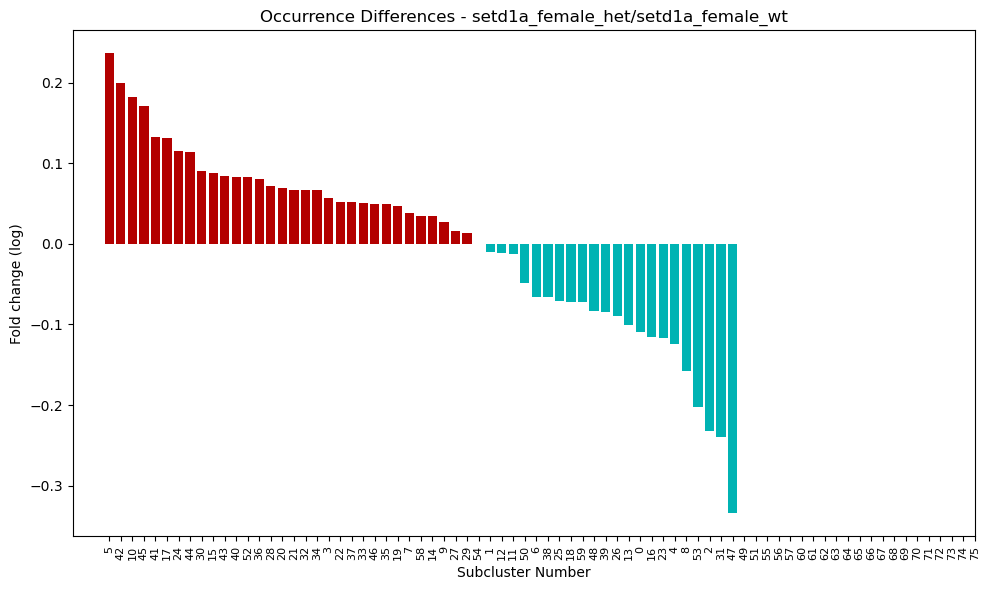

In [48]:
# import after_subtle.module as asmod
# import matplotlib.colors as mcolors
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import glob
# import os

# subcluster_num = params.subcluster_num

# group = 3
# if group == 1:
#     group1 = ['gria3_male_mut']
#     group2 = ['gria3_male_wt']
# elif group == 2:
#     group1 = ['setd1a_male_het']
#     group2 = ['setd1a_male_wt']
# elif group == 3:
#     group1 = ['setd1a_female_het']
#     group2 = ['setd1a_female_wt']

# SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1[0]],'dendiff')
# if not os.path.exists(SAVE_DIR):
#     os.makedirs(SAVE_DIR)

# ##
# # calculate the density map
# group1_folder_list = [acl.get_csv_paths(DIR[analysis_name]) for analysis_name in group1]
# cluster_counts1 = asmod.compare_cluster_occurrence(group1_folder_list, group1, subcluster_number=subcluster_num)

# group2_folder_list = [acl.get_csv_paths(DIR[analysis_name]) for analysis_name in group2]
# cluster_counts2 = asmod.compare_cluster_occurrence(group2_folder_list, group2, subcluster_number=subcluster_num)

# # replace clusters into nan with low occurrence
# low_occurrence_clusters1 = (cluster_counts1 <= min_occurrence).all(axis=1)
# low_occurrence_clusters2 = (cluster_counts2 <= min_occurrence).all(axis=1)
# low_occurrence_clusters = low_occurrence_clusters1 & low_occurrence_clusters2

# cluster_counts1[low_occurrence_clusters] = np.nan
# cluster_counts2[low_occurrence_clusters] = np.nan

# # Calculate the difference
# #density_differences = cluster_counts1.iloc[:, 0] - cluster_counts2.iloc[:, 0]
# density_differences = cluster_counts1.iloc[:, 0]/cluster_counts2.iloc[:, 0]
# # Sort the density differences in descending order along with their indices
# sorted_differences = density_differences.sort_values(ascending=False)

# # # Create the bar plot
# # fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
# # # Iterate through the sorted differences to create bars with different colors
# # for i, value in enumerate(sorted_differences.values):
# #     color = red_color if value >= 1 else complementary_color
# #     bottom_value = 1 if value >= 1 else value  # start from 1 if value >= 1 else start from value
# #     ax.bar(i, np.abs(value - 1), color=color, bottom=bottom_value)

# # # Set the x-axis tick labels as cluster numbers with a smaller font size
# # ax.set_xticks(range(len(sorted_differences)))
# # ax.set_xticklabels(sorted_differences.index, rotation=90, fontsize=8)  # Adjust the font size as needed

# # # Add labels and title
# # ax.set_xlabel('Cluster Number')
# # ax.set_ylabel('Occurence Difference')
# # ax.set_title('Sorted Density Differences'+' ('+group1[0]+'/'+group2[0]+')')

# # # Adjust the spacing to prevent overlapping labels
# # fig.tight_layout()

# # plt.savefig(os.path.join(SAVE_DIR, group1[0]+'-'+group2[0]+'_bar_dendiff.pdf'), transparent=True, dpi=300)
# # plt.savefig(os.path.join(SAVE_DIR, group1[0]+'-'+group2[0]+'_bar_dendiff.png'), transparent=False, dpi=300)
# # plt.show()


# # Create the bar plot
# fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# # Iterate through the sorted differences to create bars with different colors and heights
# for i, value in enumerate(sorted_differences.values):
#     if value >= 1:
#         # For values >= 1, the bar goes upwards
#         color = red_color
#         height = np.log(value)
#     else:
#         # For values < 1, the bar goes downwards
#         color = complementary_color
#         height = -np.log(1 / value)
    
#     ax.bar(i, height, color=color)

# # Set the x-axis tick labels as cluster numbers with a smaller font size
# ax.set_xticks(range(len(sorted_differences)))
# ax.set_xticklabels(sorted_differences.index, rotation=90, fontsize=8)

# # Add labels and title
# ax.set_xlabel('Subcluster Number')
# ax.set_ylabel('Fold change (log)')
# ax.set_title('Occurrence Differences - ' + group1[0] + '/' + group2[0])

# # Adjust the spacing to prevent overlapping labels
# fig.tight_layout()

# # # Save the plot as PDF and PNG
# plt.savefig(os.path.join(SAVE_DIR, group1[0] + '-' + group2[0] + '_bar_dendiff.pdf'), transparent=True, dpi=300)
# plt.savefig(os.path.join(SAVE_DIR, group1[0] + '-' + group2[0] + '_bar_dendiff.png'), transparent=False, dpi=300)

# plt.show()

Draw difference of behavioral usages between groups

In [ ]:
import after_subtle.module as asmod
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

subcluster_num = params.subcluster_num

group = 3
if group == 1:
    group1 = ['gria3_male_mut']
    group2 = ['gria3_male_wt']
elif group == 2:
    group1 = ['setd1a_male_het']
    group2 = ['setd1a_male_wt']
elif group == 3:
    group1 = ['setd1a_female_het']
    group2 = ['setd1a_female_wt']

SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# Define the colors
color_code_group1 = color_list[group1]
color_code_group2 = color_list[group2]

##
# Calculate the density map
group1_folder_list = acl.get_csv_paths(DIR[group1])
cluster_counts1 = asmod.calculate_filewise_cluster_occurrence(group1_folder_list, subcluster_number=subcluster_num)

group2_folder_list = acl.get_csv_paths(DIR[group2])
cluster_counts2 = asmod.calculate_filewise_cluster_occurrence(group2_folder_list, subcluster_number=subcluster_num)

# Calculate the mean and standard deviation of the occurrence rate for each cluster
group1_means = cluster_counts1.mean(axis=1)
group2_means = cluster_counts2.mean(axis=1)

# Calculate the mean ratios
mean_ratios = group1_means - group2_means
#mean_ratios = (group1_means - group2_means) / (group1_means + group2_means)

# Sort the mean ratios in descending order along with their indices
sorted_indices = mean_ratios.sort_values(ascending=False).index

# Calculate bootstrap confidence intervals for each subcluster
group1_conf_intervals = [asstats.bootstrap_confidence_interval(cluster_counts1.loc[subcluster]) for subcluster in sorted_indices]
group2_conf_intervals = [asstats.bootstrap_confidence_interval(cluster_counts2.loc[subcluster]) for subcluster in sorted_indices]

# Calculate confidence intervals for error bars
group1_errors = [(group1_means[subcluster] - interval[0], interval[1] - group1_means[subcluster]) for subcluster, interval in zip(sorted_indices, group1_conf_intervals)]
group2_errors = [(group2_means[subcluster] - interval[0], interval[1] - group2_means[subcluster]) for subcluster, interval in zip(sorted_indices, group2_conf_intervals)]

# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

# Define offset for x positions
offset = 0.1  # Adjust this offset value as needed

# Plot group1 data (shift x position to the left by the offset)
ax.errorbar(x=np.array(range(len(sorted_indices))) - offset, y=group1_means[sorted_indices], yerr=np.array(group1_errors).T, fmt='o', label=group1, color='blue')

# Plot group2 data (shift x position to the right by the offset)
ax.errorbar(x=np.array(range(len(sorted_indices))) + offset, y=group2_means[sorted_indices], yerr=np.array(group2_errors).T, fmt='o', label=group2, color='green')

# Adjust the position of the X-axis label
labels = []
for i, label in enumerate(sorted_indices):
    labels.append(plt.Text(i, 0, str(label), ha='center', va='center', fontsize=8))

# Adjust odd label position
for i in range(1, len(labels), 2):
    labels[i].set_position((i, -0.1))  # Move odd labels further down

ax.set_xticks(range(len(sorted_indices)))
ax.set_xticklabels(labels, rotation=90)

# Set the x-axis and y-axis labels and title
ax.set_xlabel('Subcluster Index')
ax.set_ylabel('Occurrence Rate')
ax.set_title('Mean with 95% Bootstrap Confidence Interval')
ax.legend()

# Adjust the spacing to prevent overlapping labels
fig.tight_layout()

# Save the figure
filename_save = 'subcluster_mean_std_' + group1 + ',' + group2
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.png'), transparent=False, dpi=300)

plt.show()

Run whole files in a specific group

In [6]:
import after_subtle.module as asmod
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import sys
sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl

group_name = 'setd1a_male_het'
subcluster_number = 44
dur_thres = 5
pre = 10
post = 20

folder_list = acl.get_csv_paths(DIR[group_name]) # directory of the data extracted from the subtle
coords_folder = COORDS_DIR[group_name] # directory of the coordinates of groups
SAVE_DIR = os.path.join(SAVE_DIR_LIST[group_name],'behaviors_in_subcluster')  # directory to save the analysis from after_subtle
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

# extract coordinates from a speicifc subcluster
frames = []
coords = pd.DataFrame()
for folder in folder_list:
    subcluster_file = os.path.join(folder, 'subclusters.csv')
    if os.path.isfile(subcluster_file):
        subclusters = pd.read_csv(subcluster_file, header=None)

        folder_name = os.path.basename(folder)
        coords_file = os.path.join(coords_folder, folder_name + '.csv')
        if os.path.isfile(coords_file):
            coords_data = pd.read_csv(coords_file, header=None)
            coords_in_subcluster = asmod.find_and_extract_coords(subclusters, coords_data, subcluster_number, dur_thres, pre=pre, post=post)

            coords = pd.concat([coords, coords_in_subcluster])

#coords.to_csv(DIR[group_name]+'/'+group_name+'_coords_subcluster'+str(subcluster_number)+'.csv', header=None, index=None)
coords.to_csv(os.path.join(SAVE_DIR, group_name+'_subcluster'+str(subcluster_number)+'.csv'), header=None, index=None)
